# Practical Time Series Analysis

## Week 1: Basic Statistics

**1. R software setup**

* 1.1. Download and install R
* 1.2. Basic descriptive statistics with R
* 1.3. Using packages in R

**2. Descriptive Statistics**

* 2.1. Numerical descriptions: 5 number summary, standard deviation
* 2.2. Graphical Descriptions: histograms, time plots

**3. Inferential Statistics**

* 3.1. Straight Line Regression
* 3.2. Regression models and diagnostics
* 3.3. T-Tests
* 3.4. Correlation

## 1. R software setup

### 1.3. Using Packages in R

In [12]:
# import library
library('faraway')

In [16]:
# retrieve data
data(coagulation, package = 'faraway')

In [17]:
# check data
head(coagulation)

coag,diet
62,A
60,A
63,A
59,A
63,B
67,B


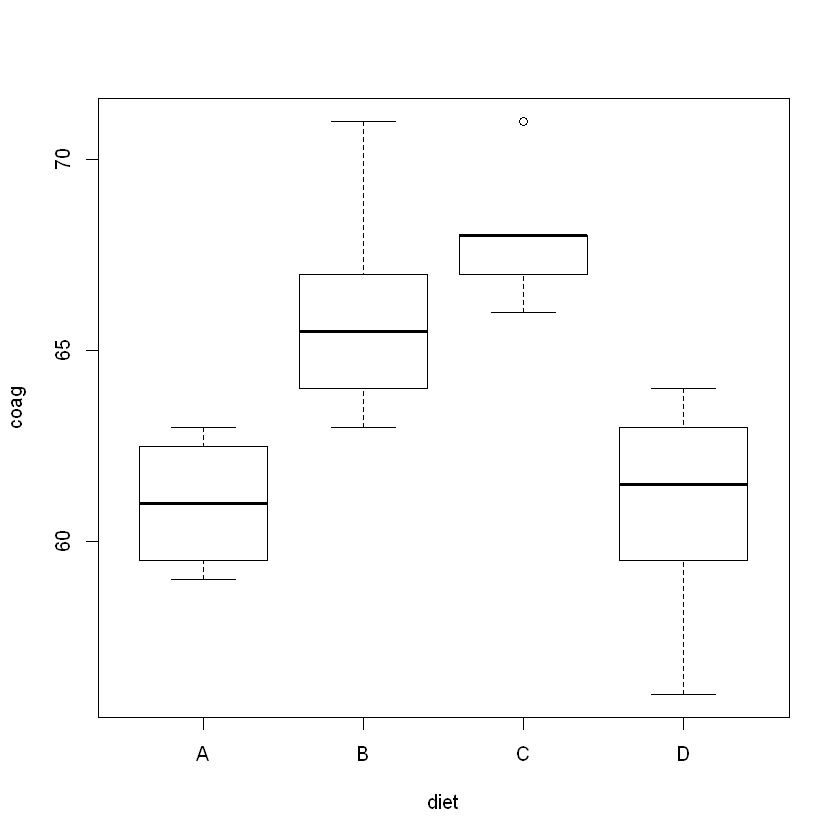

In [18]:
# plot data
plot(coag~diet, data = coagulation)

In [19]:
# get summarized statistics
summary(coagulation)

      coag       diet 
 Min.   :56.00   A:4  
 1st Qu.:61.75   B:6  
 Median :63.50   C:6  
 Mean   :64.00   D:8  
 3rd Qu.:67.00        
 Max.   :71.00        

## 2. Descriptive Statistics

### 2.1. Numerical descriptions: 5 number summary, standard deviation

#### 2.1.1. To learn concatenation operator in R

In [20]:
# c() for enetring dataset in R
data.1 = c(35, 8, 10, 23, 42)

In [21]:
data.1

[1] 35  8 10 23 42

#### 2.1.2. To find five-number summary of a dataset in R

In [22]:
summary(data.1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    8.0    10.0    23.0    23.6    35.0    42.0 

#### 2.1.3. To find sample mean and sample standard deviation of a dataset in R

In [23]:
# data.1 mean
mean(data.1)

[1] 23.6

In [25]:
# data.1 standard deviation
sd(data.1)

[1] 14.97665

### 2.2. Graphical Descriptions: histograms, time plots

#### 2.2.1. To obtain the histogram of a dataset

In [26]:
# define dataset
small.size.dataset=c(91,49,76,112,97,42,70, 100, 8, 112, 95, 90, 78, 62, 56, 94, 65, 58, 109, 70, 109, 91, 71, 76, 68, 62, 134, 57, 83, 66)

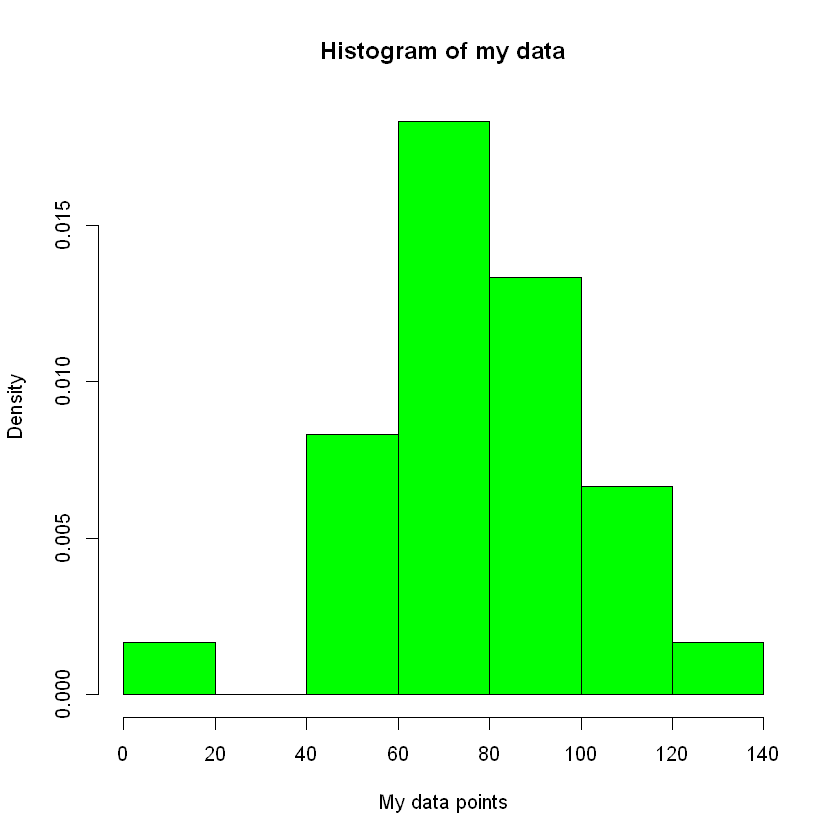

In [33]:
# plot histogram
hist(small.size.dataset, xlab = 'My data points', main = 'Histogram of my data',  freq = FALSE, col = 'green')

#### 2.2.2. To impose smooth density function over a histogram

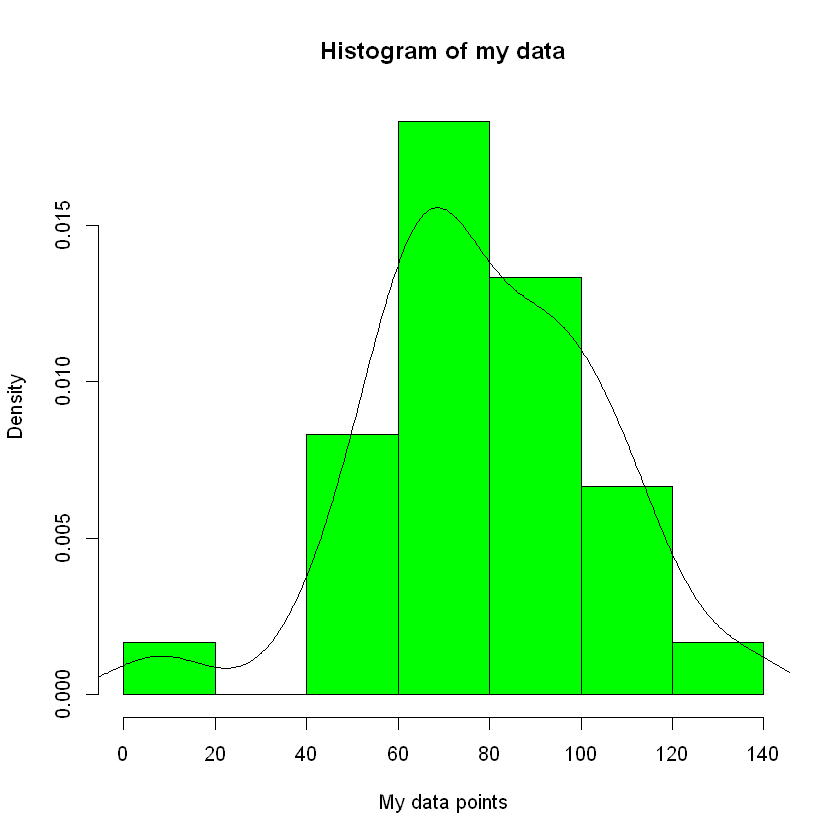

In [36]:
# user density and lines
hist(small.size.dataset, xlab = 'My data points', main = 'Histogram of my data', freq = FALSE, col = 'green')
lines(density(small.size.dataset))

#### 2.2.3. To change colors and line width in a histogram

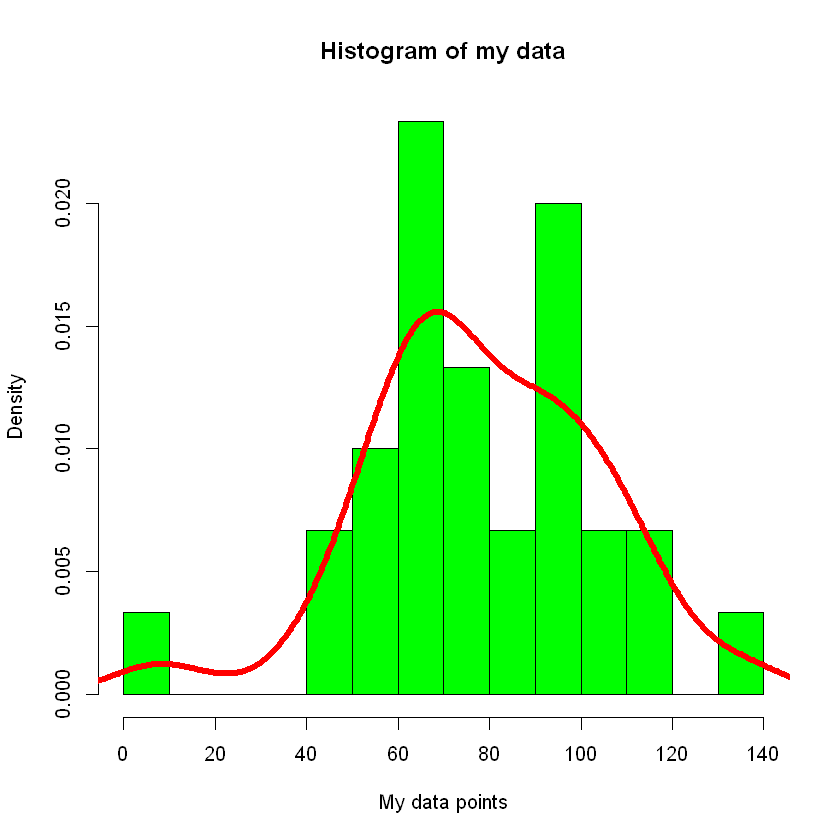

In [38]:
# set col argument to desired color and lwd to desired value
hist(small.size.dataset, xlab = 'My data points', main = 'Histogram of my data', freq = FALSE, col = 'green', breaks = 10)
lines(density(small.size.dataset), col = 'red', lwd = 5)

#### 2.2.4. To obtain scatterplot for a bivariate data

In [39]:
# set random seed
set.seed(2016)

In [40]:
# generate data from normal distribution
Test_1_scores = round(rnorm(50, 78, 10)) # data points, mean, std
Test_2_scores = round(rnorm(50, 78, 14)) # data points, mean, std

In [42]:
head(Test_1_scores)

[1] 69 88 77 81 50 75

In [43]:
head(Test_2_scores)

[1] 76 66 43 62 80 55

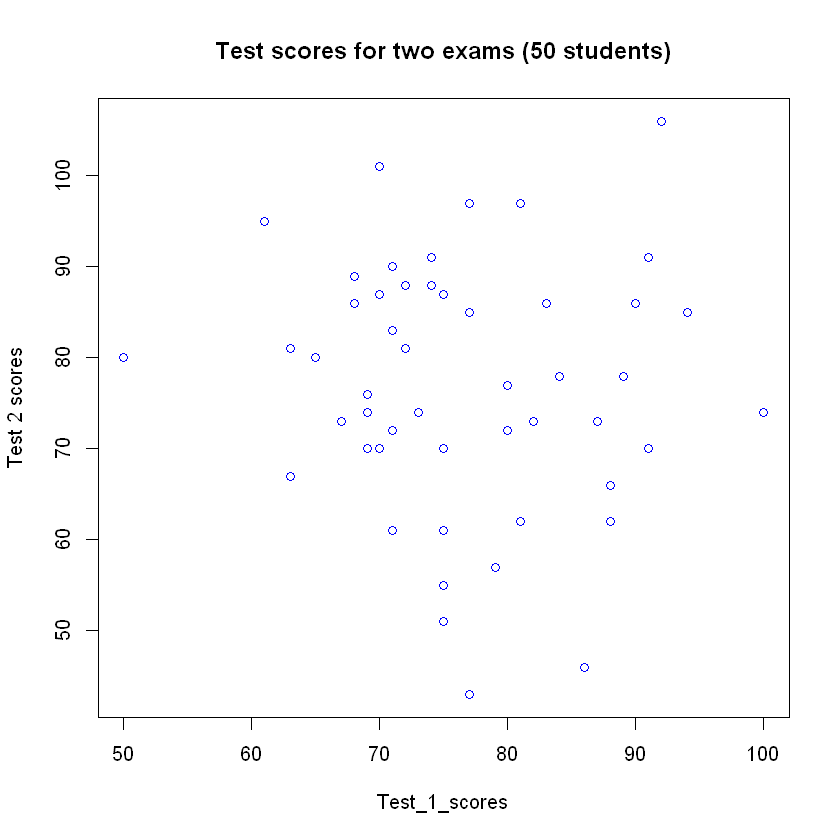

In [45]:
# plot scatter comparing test scores
plot(Test_2_scores~Test_1_scores, main='Test scores for two exams (50 students)', xlab='Test_1_scores', ylab='Test 2 scores', col='blue')

## 3. Inferential Statistics

### 3.1. Straight Line Regression

In [49]:
# co2 dataset
head(co2)

[1] 315.42 316.31 316.50 317.56 318.13 318.00

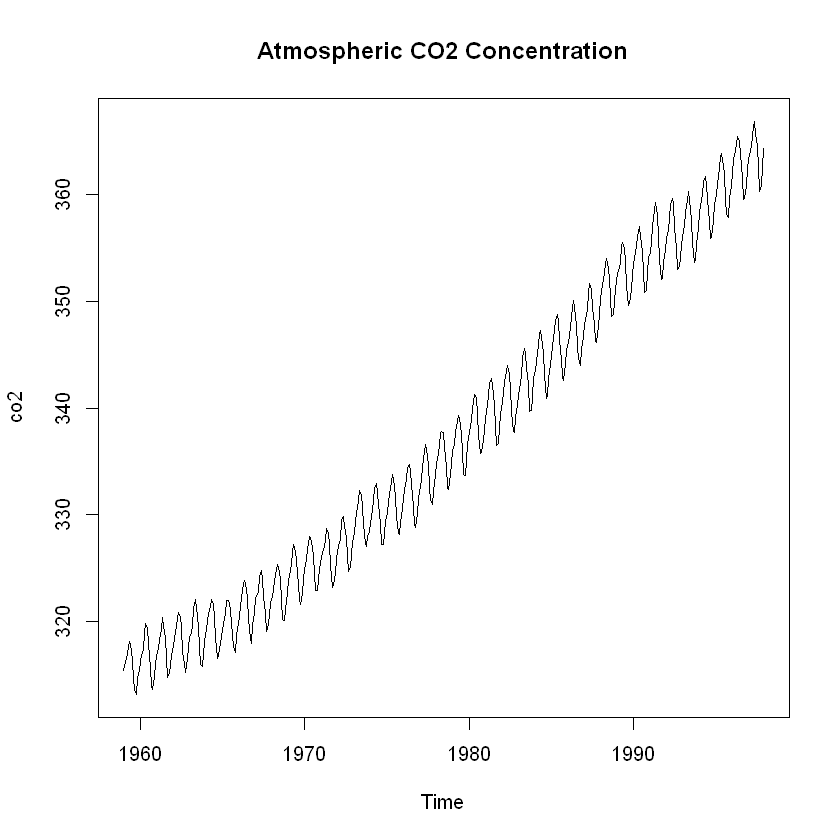

In [51]:
plot(co2, main = 'Atmospheric CO2 Concentration')

In [53]:
# linear model (ordinary least squares)
co2.linear.model = lm(co2 ~ time(co2))
co2.linear.model


Call:
lm(formula = co2 ~ time(co2))

Coefficients:
(Intercept)    time(co2)  
  -2249.774        1.307  


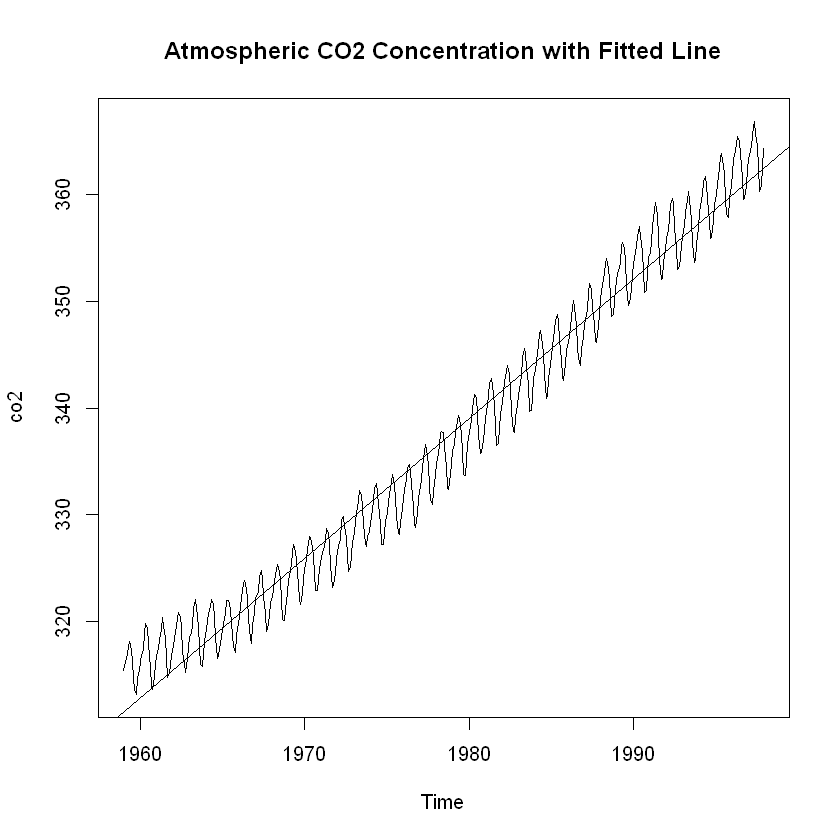

In [59]:
# plot linear model
plot(co2, main = 'Atmospheric CO2 Concentration with Fitted Line')
abline(co2.linear.model)

### 3.2. Regression models and diagnostics


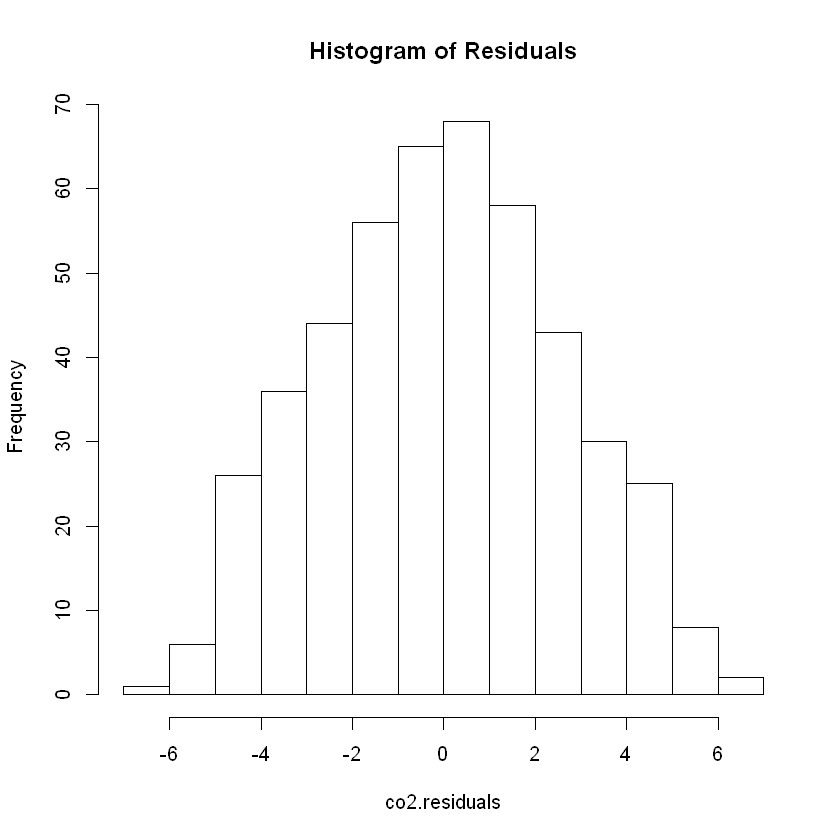

In [60]:
# assess normal distribution of residuals
co2.residuals = resid(co2.linear.model)
hist(co2.residuals, main = 'Histogram of Residuals')

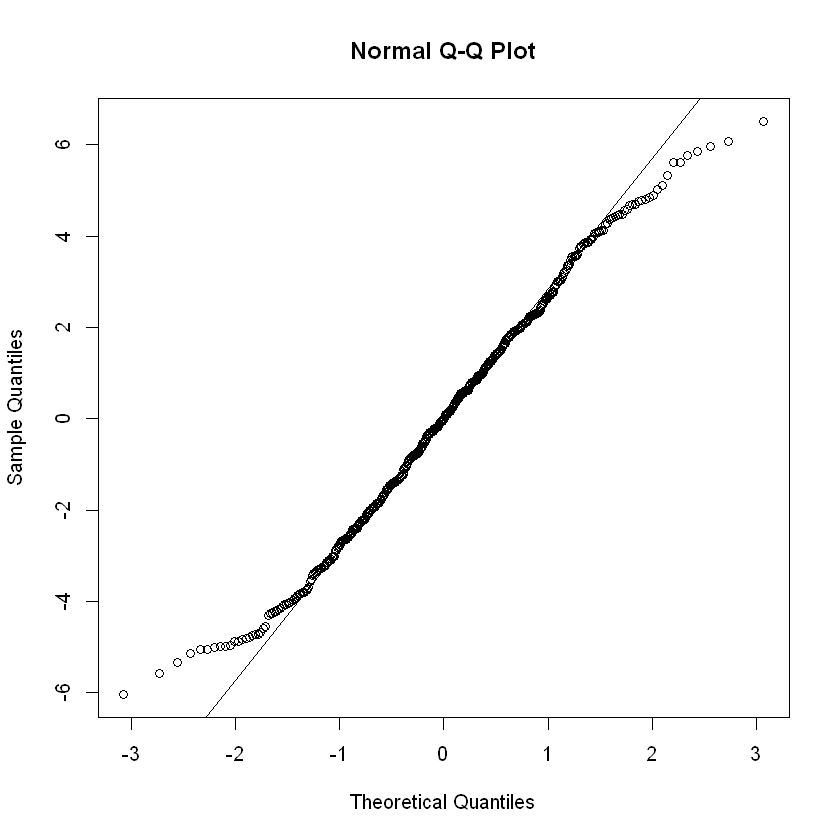

In [61]:
# assess normality with qqplot
qqnorm(co2.residuals)
qqline(co2.residuals)

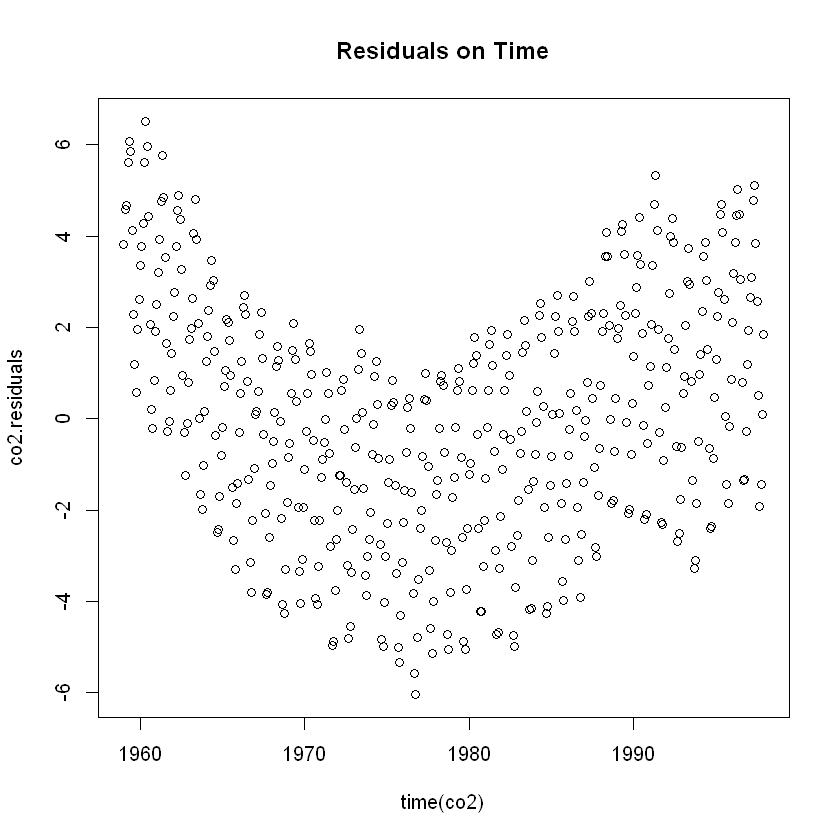

In [63]:
# timeplot on residuals
plot(co2.residuals ~ time(co2), main = 'Residuals on Time')

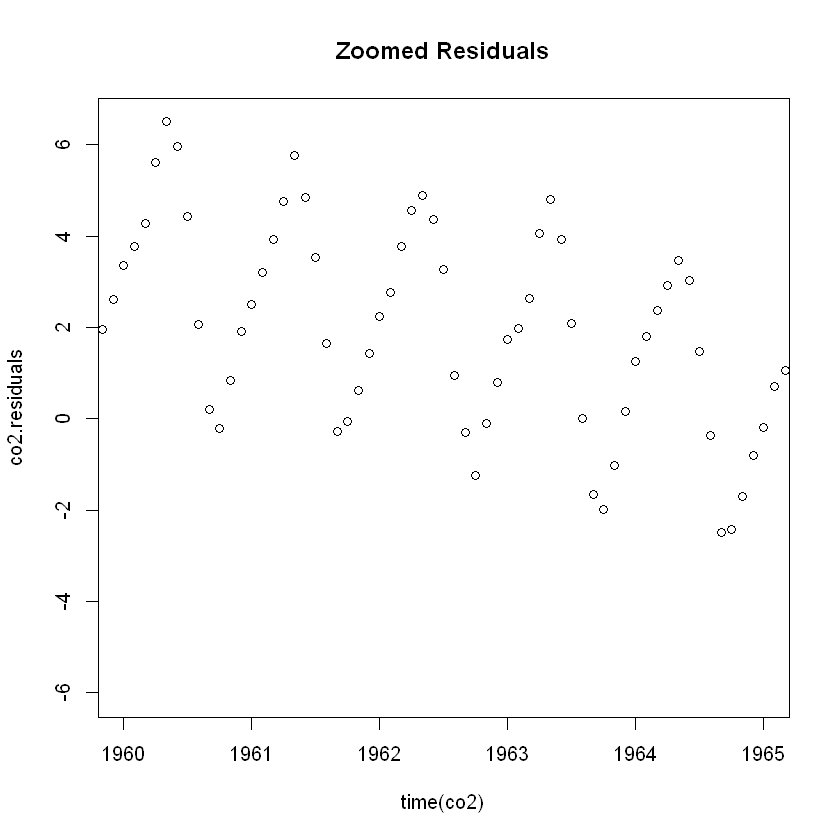

In [68]:
plot(co2.residuals ~ time(co2), xlim = c(1960, 1965), main = 'Zoomed Residuals')

Residual's variance is not constant and its distribution is not close enough to normality.

### 3.3. T-Tests

In [70]:
# sleep - data which show the effect of two soporific drugs (increase in hours of sleep compared to control) in 10 patients
sleep

extra,group,ID
0.7,1,1
-1.6,1,2
-0.2,1,3
-1.2,1,4
-0.1,1,5
3.4,1,6
3.7,1,7
0.8,1,8
0.0,1,9
2.0,1,10


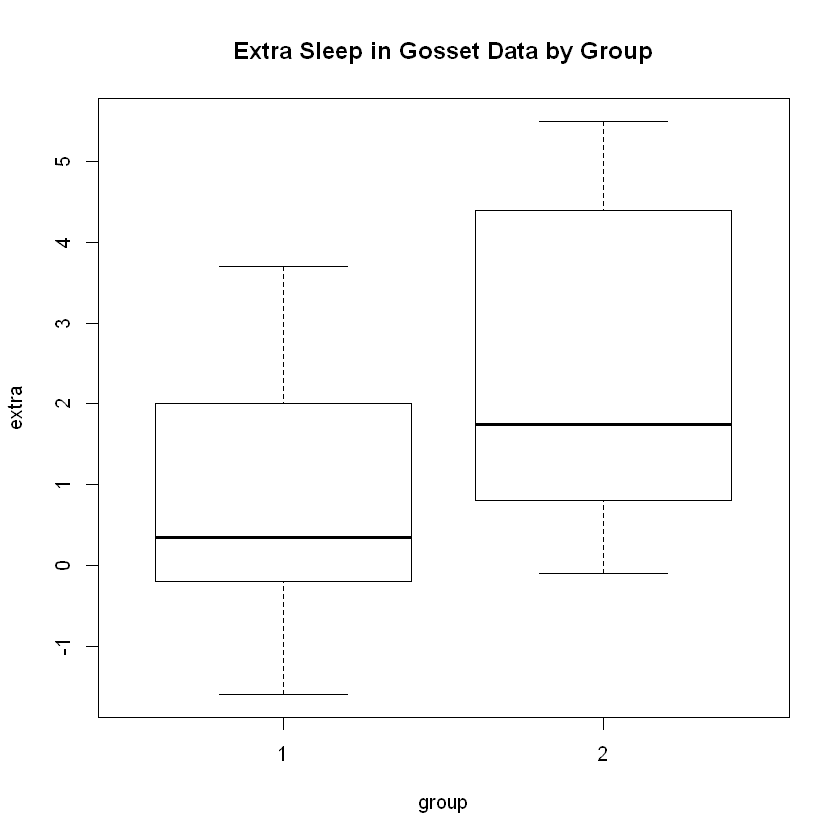

In [74]:
# plot groups
plot(extra ~ group, data = sleep, main = 'Extra Sleep in Gosset Data by Group')

In [80]:
extra.1 = sleep[sleep$group == 1, "extra"]
extra.2 = sleep[sleep$group == 2, "extra"]

In [81]:
# hypothesis test - do the groups have different means?
t.test(extra.1, extra.2, paired = TRUE, alternative = 'two.sided')


	Paired t-test

data:  extra.1 and extra.2
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of the differences 
                  -1.58 


### 3.4. Correlation

In [82]:
head(trees)

Girth,Height,Volume
8.3,70,10.3
8.6,65,10.3
8.8,63,10.2
10.5,72,16.4
10.7,81,18.8
10.8,83,19.7


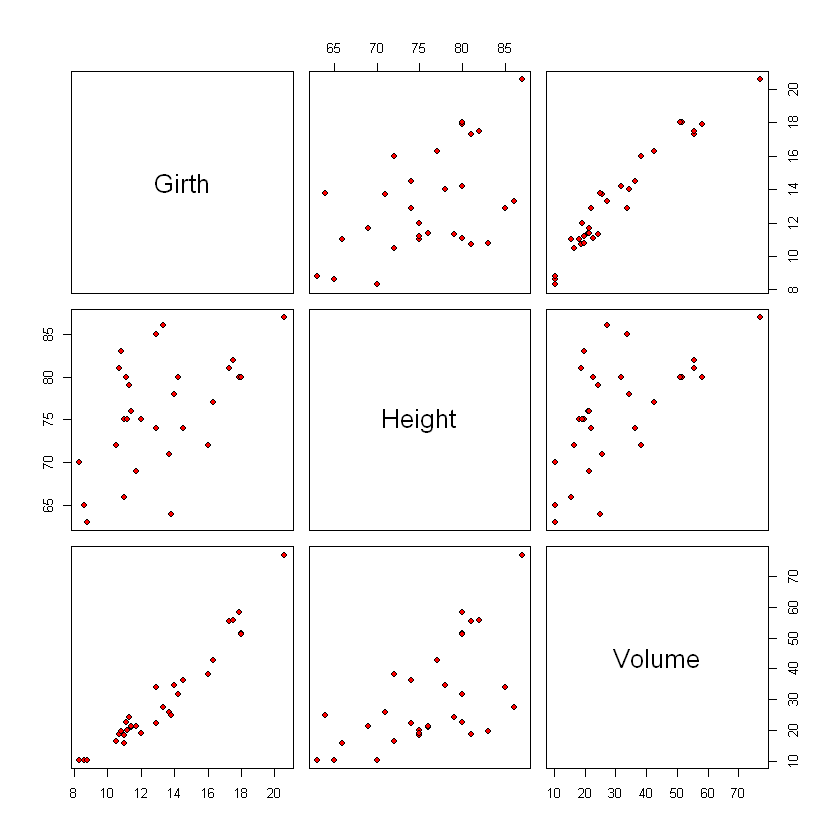

In [83]:
# pair plot
pairs(trees, pch = 21, bg = c("red"))

In [84]:
# covariance (depends on dimension)
cov(trees)

,Girth,Height,Volume
Girth,9.847914,10.38333,49.88812
Height,10.383333,40.60000,62.66000
Volume,49.888118,62.66000,270.20280


In [85]:
# correlation (dimensionless, scale by standard deviation)
cor(trees)

,Girth,Height,Volume
Girth,1.0000000,0.5192801,0.9671194
Height,0.5192801,1.0000000,0.5982497
Volume,0.9671194,0.5982497,1.0000000
